# Teoría de grafos

## Ruta más Corta

Este tipo de problema busca determinar la ruta más corta (menor costo) entre un nodo origen y un nodo destino en una red (Taha, 2017). Aunque, se puede considerar muy parecido al algoritmo de árbol mínimo de expansión, en este algoritmo no se necesita conectar a los nodos de la red, solamente conectar a los nodo necesarios para ir del nodo de salida al nodo de llegada.

### Ejemplo 6.3-6 (Taha, 2017)

En la red  que se muestra en al Figura 2, suponga que se desea determinar la ruta más corta del nodo 1 al nodo 2, es decir, s=1 y t =2 . La figura 3 muestra cómo entra la unidad de flujo en el nodo 1 y sale en el nodo 2.

![grafo](https://www.notion.so/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2Fc7833c44-e15b-4593-a69f-cccefd8f58c4%2FScreenshot_from_2020-07-26_16-05-19_1.png?table=block&id=ba43a6c7-731e-4b9d-8ad6-5c1a0e393a96&spaceId=42f53fcc-e6ec-4a21-9974-dff3ba50e637&width=1260&userId=7994855b-8314-4df8-abb9-04ba5ee1488c&cache=v2)

Vamos a resolver este ejemplo utilizando 2 librerías adicionalmente en [notion]() pueden ver una implementación del algoritmo.

In [1]:
%matplotlib inline 
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import shortest_path

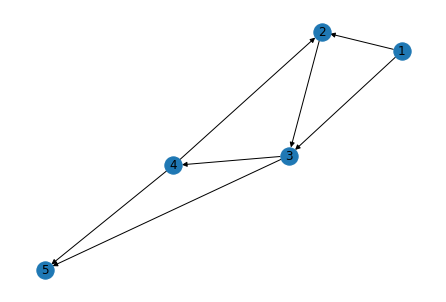

In [3]:
# Utilizando NetworkX
G = nx.DiGraph()

G.add_edge(1, 2, weight=100, size=100)
G.add_edge(1, 3, weight=30, size=30)

G.add_edge(2, 3, weight=20, size=20)

G.add_edge(3, 4, weight=10, size=10)
G.add_edge(3, 5, weight=60, size=60)

G.add_edge(4, 5, weight=50, size=50)
G.add_edge(4, 2, weight=15, size=15)


nx.draw(G, with_labels = True)

Luego haciendo uso del método [`nx.shortest_path`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html#networkx.algorithms.shortest_paths.generic.shortest_path) vamos a resolver el problema. Notesé que este método toma un parámetro que se llama _method_ el cual nos permite escoger con cual algoritmo deseamos encontrar la solución las opciones para este valor son `dijkstra` o `bellman-ford`.

Adicionalmente, el método acepta 3 parámetros más; _source_ y _target_ son los nodos de origen y destino del problema,  y el parámetro _weight_ es el cual le indica a la librería cual atributo de los arcos utilizar para calcular la distacia.

In [8]:
path = nx.shortest_path(G, weight="weight", source=1, target=2)
print(path)

[1, 3, 4, 2]


Luego vamos a resolver el problema utilizando la librería scipy y especificamente la función `shortest_path`

In [9]:
# Utilizando Scipy
X = csr_matrix([
    #1,   2,  3,  4, 5
    [0, 100, 30,  0,  0], #1
    [0,   0, 20,  0,  0], #2
    [0,   0,  0, 10, 60], #3
    [0,  15,  0,  0, 50], #4
    [0,   0,  0,  0,  0], #5
])

dist_matrix, predecessors = shortest_path(csgraph=X, directed=True, return_predecessors=True)

print(predecessors)

[[-9999     3     0     2     2]
 [-9999 -9999     1     2     2]
 [-9999     3 -9999     2     2]
 [-9999     3     1 -9999     3]
 [-9999 -9999 -9999 -9999 -9999]]


🎉🎉🎉 Listo ya sabemos resolver un árbol de expansión mínima con python

**Nota**: si quieren saber que significa las siglas csr hacen referencia a _Compressed Sparse Row_ y puede leer un poco más [acá](https://en.wikipedia.org/wiki/Sparse_matrix#Compressed_sparse_row_(CSR,_CRS_or_Yale_format))